In [19]:
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings('ignore')

In [46]:
#!pip install pymongo

     -------------------------------------- 408.2/408.2 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 300.0/300.0 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 74.5/74.5 kB ? eta 0:00:00


In [50]:
import nltk
from pymongo import MongoClient
import re
import json
import time

In [4]:
# txt 파일 열어주기
f = open('20230724_etnews_c_its.txt', 'r')
data = f.read()
print(data)

발행일 : 2023-07-20 17:00자율협력주행 시대를 열기 위한 첫 단계인 보안 인증체계 기준이 마련됐다.

국토교통부는 자율협력주행 인증관리기준을 제정하고 20일 고시했다.

<게티이미지뱅크>
자율협력주행을 위해서는 보안 기술이 필수다. 센서나 카메라 등 인식 기술에 의존하는 일반적인 자율주행자동차와 달리 달리 차량과 차량, 차량과 인프라가 서로 소통해야 하기 때문이다. 인식 기술이 아무리 뛰어나다고 해도 모든 데이터를 처리하는 데에는 한계가 있는데다 보이지 않은 정보까지는 처리할 수 없어 완전자율주행에서는 자율협력주행기술이 필요하다.

자율협력주행 환경에서 차량 및 인프라는 해킹, 개인정보 침해, 데이터 오전송 등 다양한 통신 위협에 노출되어 있는 만큼 보안성을 확보해야 한다.

정부는 보안을 위해 인증서 개념을 도입키로 했다. 이번에 보안 인증의 가이드라인이라고 할 수 있는 인증체계를 제정했다. 인증서가 발급된 차량 및 인프라만 통신을 허용하기 위해 인증관리체계를 구축하고, 인증업무의 방법·절차, 인증기관 시설기준, 인증서 유효기간 등 자율협력주행 인증업무에 관한 사항을 세부적으로 규정했다. 인증 업무는 인증관리센터·인증기관·검증기관을 두고 추진한다. 인증관리센터는 인·검증기관의 인증서 발급·관리, 정보 및 기록 유지, 인증업무 관련 교육 등의 역할을 하고 인증기관은 가입자 인증서의 발급·갱신·폐지, 인증서 유효성 확인 등을 맡는다. 여기에 이상행위 정보를 분석하고 검증하기 위한 검증기관도 별도로 두기로 했다.

인증서의 최대 유효기간은 최상위인증기관 인증서 24년, 인증·검증기관 인증서 12년, 등록인증서 6년, 보안인증서 8일 등으로 정했다.

보안 인증 체계 기준 제정은 자율협력 주행 구현을 위한 첫 단계다. 국토교통부는 이 기준에 맞는 인증기관이나 인증센터 설립도 추진한다. 현재 국토부는 센서와 소프트웨어 등 인증 환경을 갖춘 인증센터를 구축하기 위해 기획재정부의 예비타당성조사를 받고 있다. 약 1800억원 규모로 심사 진행 중으로, 연내 심

In [13]:
from konlpy.tag import Okt
from collections import Counter

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(data)

n_adj = []
# 명사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun'] and len(word) > 1:
        n_adj.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for word, tag in line if tag in ['Noun','Adjective'] and len(word) > 1]
print(n_adj)

['발행', '자율', '협력', '주행', '시대', '열기', '단계', '보안', '인증', '체계', '기준', '마련', '국토교통부', '자율', '협력', '주행', '인증', '관리', '기준', '제정', '고시', '게티', '이미지', '뱅크', '자율', '협력', '주행', '보안', '기술', '필수', '센서', '카메라', '인식', '기술', '의존', '일반', '자율', '주행', '자동차', '달리', '달리', '차량', '차량', '차량', '인프라', '서로', '소통', '때문', '인식', '기술', '해도', '모든', '데이터', '처리', '한계', '보이지', '정보', '처리', '완전', '자율', '주행', '자율', '협력', '주행', '기술', '자율', '협력', '주행', '환경', '차량', '인프라', '해킹', '개인정보', '침해', '데이터', '전송', '통신', '위협', '노출', '만큼', '보안', '확보', '정부', '보안', '위해', '인증서', '개념', '도입', '이번', '보안', '인증', '가이드라인', '인증', '체계', '제정', '인증서', '발급', '차량', '인프라', '통신', '허용', '위해', '인증', '관리', '체계', '구축', '인증', '업무', '방법', '절차', '인증', '기관', '시설', '기준', '인증서', '유효', '기간', '자율', '협력', '주행', '인증', '업무', '사항', '세부', '규정', '인증', '업무', '인증', '관리', '센터', '인증', '기관', '검증', '기관', '추진', '인증', '관리', '센터', '검증', '기관', '인증서', '발급', '관리', '정보', '기록', '유지', '인증', '업무', '관련', '교육', '역할', '인증', '기관', '가입자', '인증서', '발급', '갱신', '폐지', '인증서', '유효', '확인', '여기', '상행

In [28]:
#제외할 단어 추가
stop_words = "발행 마련 게티 이미지 뱅크 달리 차량 위해 상위 있다 기술 개발 최근 전자신문" #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]

In [29]:
n_adj

['자율',
 '협력',
 '주행',
 '시대',
 '열기',
 '단계',
 '보안',
 '인증',
 '체계',
 '기준',
 '국토교통부',
 '자율',
 '협력',
 '주행',
 '인증',
 '관리',
 '기준',
 '제정',
 '고시',
 '자율',
 '협력',
 '주행',
 '보안',
 '필수',
 '센서',
 '카메라',
 '인식',
 '의존',
 '일반',
 '자율',
 '주행',
 '자동차',
 '인프라',
 '서로',
 '소통',
 '때문',
 '인식',
 '해도',
 '모든',
 '데이터',
 '처리',
 '한계',
 '보이지',
 '정보',
 '처리',
 '완전',
 '자율',
 '주행',
 '자율',
 '협력',
 '주행',
 '자율',
 '협력',
 '주행',
 '환경',
 '인프라',
 '해킹',
 '개인정보',
 '침해',
 '데이터',
 '전송',
 '통신',
 '위협',
 '노출',
 '만큼',
 '보안',
 '확보',
 '정부',
 '보안',
 '인증서',
 '개념',
 '도입',
 '이번',
 '보안',
 '인증',
 '가이드라인',
 '인증',
 '체계',
 '제정',
 '인증서',
 '발급',
 '인프라',
 '통신',
 '허용',
 '인증',
 '관리',
 '체계',
 '구축',
 '인증',
 '업무',
 '방법',
 '절차',
 '인증',
 '기관',
 '시설',
 '기준',
 '인증서',
 '유효',
 '기간',
 '자율',
 '협력',
 '주행',
 '인증',
 '업무',
 '사항',
 '세부',
 '규정',
 '인증',
 '업무',
 '인증',
 '관리',
 '센터',
 '인증',
 '기관',
 '검증',
 '기관',
 '추진',
 '인증',
 '관리',
 '센터',
 '검증',
 '기관',
 '인증서',
 '발급',
 '관리',
 '정보',
 '기록',
 '유지',
 '인증',
 '업무',
 '관련',
 '교육',
 '역할',
 '인증',
 '기관',
 '가입자',
 '인증서',
 '발급',
 '갱신',
 '폐지'

In [30]:
#가장 많이 나온 단어 200개 저장
counts = Counter(n_adj)
tags = counts.most_common(200)

In [31]:
tags

[('자율', 1139),
 ('주행', 1039),
 ('사업', 1014),
 ('교통', 913),
 ('서비스', 721),
 ('통신', 506),
 ('기반', 505),
 ('구축', 485),
 ('정보', 472),
 ('시스템', 456),
 ('기업', 444),
 ('자동차', 432),
 ('지능', 421),
 ('도로', 404),
 ('통해', 364),
 ('데이터', 351),
 ('제공', 351),
 ('모빌리티', 345),
 ('인프라', 338),
 ('체계', 327),
 ('안전', 315),
 ('스마트', 312),
 ('산업', 311),
 ('실증', 307),
 ('보안', 298),
 ('디지털', 297),
 ('미래', 290),
 ('활용', 286),
 ('플랫폼', 284),
 ('관련', 280),
 ('계획', 280),
 ('협력', 276),
 ('차세대', 267),
 ('분야', 267),
 ('추진', 259),
 ('지원', 257),
 ('기자', 256),
 ('웨이브', 247),
 ('대표', 245),
 ('방식', 232),
 ('상용', 231),
 ('시장', 230),
 ('한국', 229),
 ('솔루션', 218),
 ('정부', 206),
 ('혁신', 200),
 ('국내', 197),
 ('적용', 196),
 ('진행', 193),
 ('미국', 182),
 ('관리', 174),
 ('참여', 171),
 ('올해', 166),
 ('표준', 165),
 ('통합', 162),
 ('인증', 161),
 ('환경', 161),
 ('세계', 161),
 ('운영', 155),
 ('행차', 153),
 ('상황', 152),
 ('정책', 151),
 ('글로벌', 149),
 ('확대', 148),
 ('예정', 147),
 ('지역', 146),
 ('확보', 145),
 ('분석', 143),
 ('국토교통부', 142),
 ('제품', 141),


In [32]:
# 이미지 추가(워드크라우드 모양 설정)
#import numpy as np
from PIL import Image

#mask = Image.new("RGBA",(2275,2275), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
#image = Image.open('heart.png').convert("RGBA")
#x,y = image.size
#mask.paste(image,(0,0,x,y),image)
#mask = np.array(mask)

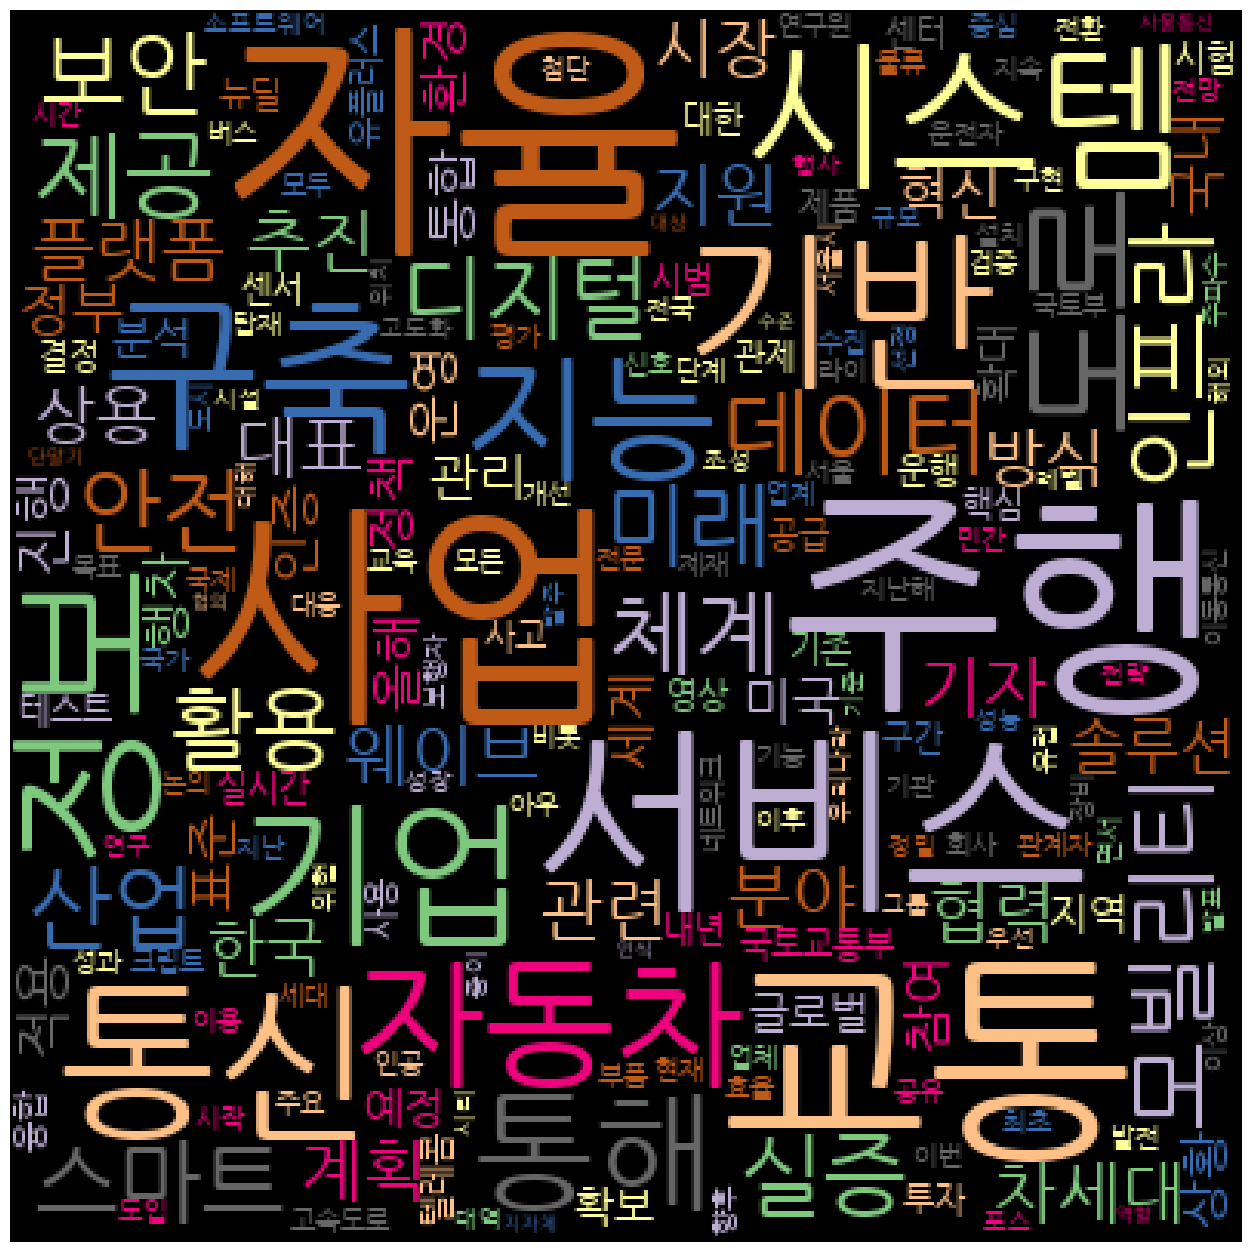

In [33]:
from wordcloud import WordCloud

###WordCloud(워드크라우드) 만들기###
#폰트지정
font='NanumGothic.ttf'
word_cloud = WordCloud(font_path=font, background_color='black', width = 400, height = 400, max_font_size=80, colormap='Accent').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('wc_c-its.png', bbox_inches='tight')
plt.show()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", 
                     max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(n_adj)

## LDA 토픽 모델링 실행

### Gensim을 이용한 토픽 모델링

In [35]:
# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) 
    # stopwords 제외
    words = [word for word in tokens if (word not in stop_words) and len(word) > 2]
    return words

news = [tokenizer(n_adj) for n_adj in n_adj]

In [51]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(news)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in news]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 1898
#Number of unique words after removing rare and common words: 456
#Number of unique tokens: 456
#Number of documents: 67724


In [37]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)
# corpus는 doc2bow()를 이용해 변환된 카운터 벡터 리스트

CPU times: total: 9.48 s
Wall time: 9.49 s


In [38]:
model.print_topics(num_words=10)
# print_topics 함수는 각 토픽의 상위 비중 단어를 볼 수 있는 gensim 패키지 내장 함수이다.
# num_topics 매개변수로 보고 싶은 토픽의 수를, num_words로 각 토픽의 상위 단어 수를 지정할 수 있다.

[(0,
  '0.429*"솔루션" + 0.200*"이동통신" + 0.195*"국토교통부" + 0.082*"전문가" + 0.015*"디지털화" + 0.001*"어린이" + 0.000*"텔레콤" + 0.000*"네트워크" + 0.000*"테스트" + 0.000*"중소기업"'),
 (1,
  '0.373*"차세대" + 0.133*"국토부" + 0.119*"지난해" + 0.100*"고속도로" + 0.088*"소프트웨어" + 0.045*"정통부" + 0.040*"연구기관" + 0.017*"자원부" + 0.017*"대한민국" + 0.002*"컨벤션"'),
 (2,
  '0.222*"관계자" + 0.195*"운전자" + 0.120*"신호등" + 0.111*"클라우드" + 0.096*"크립트" + 0.064*"카메라" + 0.058*"표준화" + 0.047*"코엑스" + 0.005*"보이지" + 0.000*"텔레콤"'),
 (3,
  '0.332*"자동차" + 0.231*"웨이브" + 0.182*"데이터" + 0.057*"보행자" + 0.051*"우리나라" + 0.049*"가능성" + 0.020*"생태계" + 0.013*"싱가포르" + 0.013*"업그레이드" + 0.013*"교통신호"'),
 (4,
  '0.381*"플랫폼" + 0.306*"실시간" + 0.082*"셀룰러" + 0.071*"빅데이터" + 0.048*"사용자" + 0.021*"동영상" + 0.009*"마찬가지" + 0.007*"개인정보" + 0.000*"텔레콤" + 0.000*"테스트"'),
 (5,
  '0.613*"스마트" + 0.127*"연구원" + 0.092*"도로공사" + 0.048*"표지판" + 0.022*"대부분" + 0.015*"유지관리" + 0.003*"가이드라인" + 0.000*"텔레콤" + 0.000*"테스트" + 0.000*"네트워크"'),
 (6,
  '0.642*"시스템" + 0.067*"정보통" + 0.055*"스스로" + 0.050*"하이브리드" + 0.039*"세미나" + 0

In [39]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]


In [40]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.059139  0.440822       1        1  12.795316
3      0.438493 -0.106987       2        1  12.470273
8     -0.051627 -0.037498       3        1  10.041642
1     -0.062258 -0.041864       4        1   9.937364
6     -0.058098 -0.040345       5        1   9.508019
4     -0.065314 -0.042926       6        1   9.187147
5     -0.065644 -0.043101       7        1   9.133081
0     -0.063460 -0.042540       8        1   9.102097
9     -0.061427 -0.041539       9        1   8.927895
2     -0.069805 -0.044021      10        1   8.897167, topic_info=      Term        Freq       Total Category  logprob  loglift
29     시스템  791.000000  791.000000  Default  30.0000  30.0000
79     서비스  877.000000  877.000000  Default  29.0000  29.0000
75     스마트  724.000000  724.000000  Default  28.0000  28.0000
90     솔루션  506.000000  506.000000  Default  27.0000  27.0000
3      인프라  510.000000  510.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
185  정보통신부    0.208635    1.760595  Topic10  -8.6148   0.2866
135    레이더    0.208638    1.760646  Topic10  -8.6148   0.2866
448  브로드밴드    0.208976    1.764101  Topic10  -8.6132   0.2863
313  내비게이션    0.208678    1.761167  Topic10  -8.6146   0.2865
450    가처분    0.208732    1.762443  Topic10  -8.6143   0.2860

[613 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
48        2  0.974390    가능성
8         7  0.717662  가이드라인
6         6  0.889506   개인정보
70        3  0.974162    경쟁력
63        4  0.990745   고속도로
...     ...       ...    ...
31        6  0.996453    플랫폼
20        9  0.894469    하나로
51        5  0.970785  하이브리드
68        1  0.952849   하이패스
25        3  0.952447    활성화

[90 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 9, 2, 7, 5, 6, 1, 10, 3])

In [41]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-20.524328335316767


num_topics: 6, perplexity: -5.906, coherence: -20.732
num_topics: 7, perplexity: -6.103, coherence: -20.594
num_topics: 8, perplexity: -6.906, coherence: -20.516
num_topics: 9, perplexity: -9.585, coherence: -20.601
num_topics: 10, perplexity: -13.768, coherence: -20.795
num_topics: 11, perplexity: -15.775, coherence: -20.791
num_topics: 12, perplexity: -19.463, coherence: -21.151
num_topics: 13, perplexity: -20.790, coherence: -21.100
num_topics: 14, perplexity: -22.001, coherence: -21.064
num_topics: 15, perplexity: -23.254, coherence: -20.851
num_topics: 16, perplexity: -24.470, coherence: -20.903
num_topics: 17, perplexity: -25.600, coherence: -20.739
num_topics: 18, perplexity: -26.933, coherence: -20.228
num_topics: 19, perplexity: -28.207, coherence: -19.464
num_topics: 20, perplexity: -29.231, coherence: -19.439
num_topics: 21, perplexity: -30.707, coherence: -19.436
num_topics: 22, perplexity: -31.874, coherence: -19.472
num_topics: 23, perplexity: -33.189, coherence: -19.445


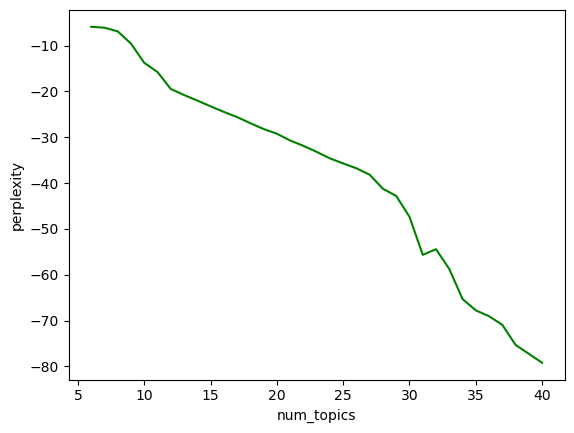

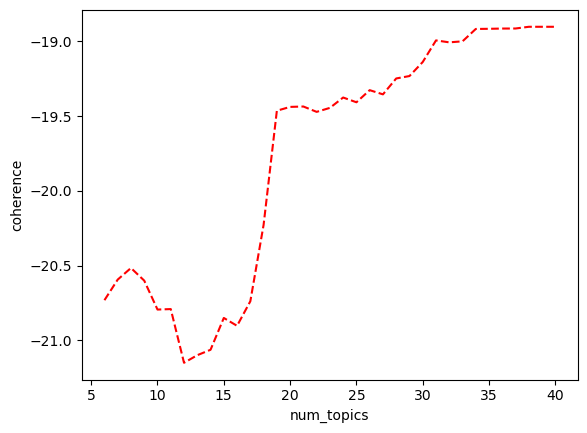

In [43]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_coherence(corpus, dictionary, start=6, end=40)

In [ ]:
from gensim.models import LdaModel

num_topics = 6 # 혼란도와 토픽 응집도 분포에 따라 토픽의 개수를 10개에서 6개로 조정
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)